In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn import tree
import joblib

In [2]:
cwd = os.getcwd()
#read excel using pandas
ls_df = pd.read_excel(cwd + r"\sl2.xlsx")

In [3]:
#Gives info about entire dataframe
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Reservoir          1095 non-null   object        
 1   Site ID            1095 non-null   object        
 2   Lat                1095 non-null   float64       
 3   Long               1095 non-null   float64       
 4   Sampling Date      1095 non-null   datetime64[ns]
 5   BGA PC (cells/mL)  1095 non-null   float64       
 6   Turbidity (NTU)    1095 non-null   float64       
 7   AOT                1095 non-null   int64         
 8   B2                 1095 non-null   int64         
 9   B3                 1095 non-null   int64         
 10  B4                 1095 non-null   int64         
 11  B5                 1095 non-null   int64         
 12  B6                 1095 non-null   int64         
 13  B7                 1095 non-null   int64         
 14  B11     

In [4]:
# #Drop null values if there are any
ls_df = ls_df.dropna()
# #After dropping null values checking the dataframe again
ls_df.isnull().sum()

Reservoir            0
Site ID              0
Lat                  0
Long                 0
Sampling Date        0
BGA PC (cells/mL)    0
Turbidity (NTU)      0
AOT                  0
B2                   0
B3                   0
B4                   0
B5                   0
B6                   0
B7                   0
B11                  0
B12                  0
B8A                  0
dtype: int64

In [5]:
#creating a new dataframe to drop columns
dc = pd.DataFrame()

#dropped unnencessary columns for regression
dc = ls_df.drop(columns = ["Reservoir","Site ID", "Lat", "Long", "Sampling Date", ], axis = 1)

dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BGA PC (cells/mL)  1095 non-null   float64
 1   Turbidity (NTU)    1095 non-null   float64
 2   AOT                1095 non-null   int64  
 3   B2                 1095 non-null   int64  
 4   B3                 1095 non-null   int64  
 5   B4                 1095 non-null   int64  
 6   B5                 1095 non-null   int64  
 7   B6                 1095 non-null   int64  
 8   B7                 1095 non-null   int64  
 9   B11                1095 non-null   int64  
 10  B12                1095 non-null   int64  
 11  B8A                1095 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 111.2 KB


In [6]:
dc.describe()

,BGA PC (cells/mL),Turbidity (NTU),AOT,B2,B3,B4,B5,B6,B7,B11,B12,B8A
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,5262.816530,149.566941,142.924201,337.874886,482.400913,383.269406,379.959817,226.634703,237.484932,181.253881,142.263927,202.144292
std,6837.492113,1325.246578,53.299306,183.394780,205.515553,246.788872,243.570478,169.986428,177.964377,142.051473,113.701567,161.189271
min,-2744.000000,-999.900000,65.000000,1.000000,105.000000,10.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000
25%,1120.500000,0.800000,83.000000,245.000000,343.000000,225.000000,239.500000,85.000000,99.000000,73.000000,62.000000,50.000000
50%,3439.000000,4.100000,165.000000,328.000000,462.000000,331.000000,341.000000,209.000000,222.000000,135.000000,100.000000,198.000000
75%,7128.500000,10.900000,177.000000,431.000000,584.000000,459.000000,457.000000,332.000000,347.500000,265.000000,208.000000,304.000000
max,112064.000000,9999.900000,260.000000,1055.000000,1240.000000,1524.000000,1511.000000,814.000000,827.000000,706.000000,571.000000,789.000000


In [7]:
dc = dc.where(dc["BGA PC (cells/mL)"] > 0)
dc = dc.where(dc["B2"] < 1000)
dc = dc.where(dc["B3"] < 1000)
#dc = dc.where(dc["B8A"] < 1000)
dc = dc.where(dc["B5"] < 1000)

In [8]:
dc.describe()

,BGA PC (cells/mL),Turbidity (NTU),AOT,B2,B3,B4,B5,B6,B7,B11,B12,B8A
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,5494.071137,157.023421,138.515063,317.097182,456.176871,348.470360,348.081633,214.849368,227.100097,175.440233,136.583090,196.838678
std,6973.043119,1366.772977,49.665036,149.605715,165.042342,179.392355,178.930831,154.518405,166.417548,136.904862,108.429791,156.451436
min,0.400000,-999.900000,65.000000,1.000000,105.000000,10.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000
25%,1178.000000,0.700000,83.000000,240.000000,341.000000,225.000000,239.000000,83.000000,97.000000,72.000000,62.000000,50.000000
50%,3772.000000,3.400000,165.000000,324.000000,451.000000,318.000000,328.000000,209.000000,221.000000,135.000000,100.000000,196.000000
75%,7654.000000,9.300000,173.000000,425.000000,559.000000,440.000000,435.000000,325.000000,331.000000,253.000000,193.000000,300.000000
max,112064.000000,9999.900000,260.000000,715.000000,935.000000,875.000000,963.000000,638.000000,827.000000,706.000000,571.000000,789.000000


In [9]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BGA PC (cells/mL)  1029 non-null   float64
 1   Turbidity (NTU)    1029 non-null   float64
 2   AOT                1029 non-null   float64
 3   B2                 1029 non-null   float64
 4   B3                 1029 non-null   float64
 5   B4                 1029 non-null   float64
 6   B5                 1029 non-null   float64
 7   B6                 1029 non-null   float64
 8   B7                 1029 non-null   float64
 9   B11                1029 non-null   float64
 10  B12                1029 non-null   float64
 11  B8A                1029 non-null   float64
dtypes: float64(12)
memory usage: 111.2 KB


In [10]:
dc = dc.dropna()
dc.head()

,BGA PC (cells/mL),Turbidity (NTU),AOT,B2,B3,B4,B5,B6,B7,B11,B12,B8A
0,3656.0,28.3,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
1,3399.0,25.8,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
2,3491.0,24.9,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
3,3308.0,25.2,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
4,3167.0,24.8,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0


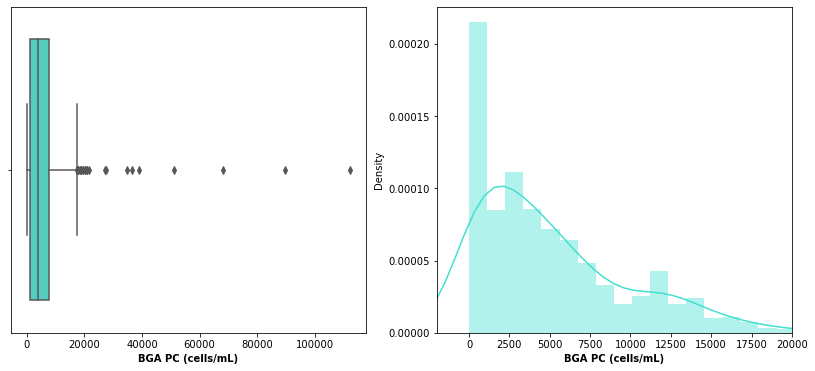

In [11]:
#BGA distribution plot 
plt.figure(figsize = (14,6))
plt.subplot(121)
ax1 = sns.boxplot(dc["BGA PC (cells/mL)"], color = 'turquoise')
plt.subplot(122)
ax2 = sns.distplot(dc["BGA PC (cells/mL)"], bins=100, color = 'turquoise')
ax1.set_xlabel("BGA PC (cells/mL)", fontweight = 'bold')
ax2.set_xlabel("BGA PC (cells/mL)", fontweight = 'bold')
ax2.set_xlim(-2000,20000)
#plt.savefig("turb_dist.tif", dpi = 300)
plt.show()

mu=7.895483462942483, sigma=1.521105846593575


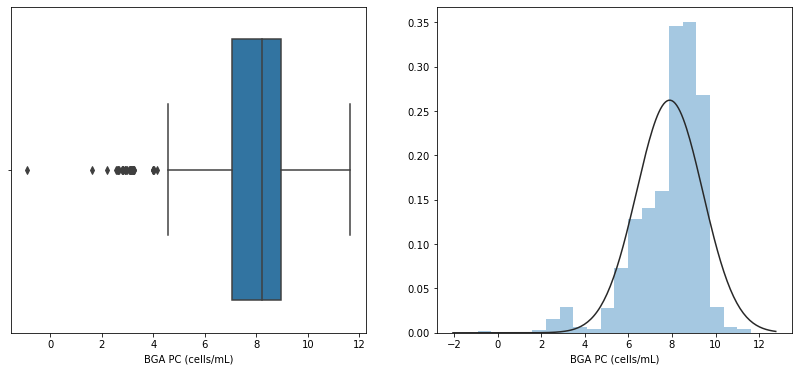

In [12]:
#BGA distribution plot 
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.boxplot(np.log(dc["BGA PC (cells/mL)"]))
plt.subplot(122)
sns.distplot(np.log(dc["BGA PC (cells/mL)"]), bins=20, fit=stats.norm, kde=False)
# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(np.log(dc["BGA PC (cells/mL)"]))
print("mu={0}, sigma={1}".format(mu, sigma))
plt.show()

In [13]:
df = dc.copy()
df["BGA PC (cells/mL)"] = np.log(dc["BGA PC (cells/mL)"])
df.head()

,BGA PC (cells/mL),Turbidity (NTU),AOT,B2,B3,B4,B5,B6,B7,B11,B12,B8A
0,8.204125,28.3,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
1,8.131237,25.8,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
2,8.157944,24.9,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
3,8.104099,25.2,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
4,8.060540,24.8,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0


array([[<AxesSubplot:title={'center':'BGA PC (cells/mL)'}>,
        <AxesSubplot:title={'center':'Turbidity (NTU)'}>,
        <AxesSubplot:title={'center':'AOT'}>],
       [<AxesSubplot:title={'center':'B2'}>,
        <AxesSubplot:title={'center':'B3'}>,
        <AxesSubplot:title={'center':'B4'}>],
       [<AxesSubplot:title={'center':'B5'}>,
        <AxesSubplot:title={'center':'B6'}>,
        <AxesSubplot:title={'center':'B7'}>],
       [<AxesSubplot:title={'center':'B11'}>,
        <AxesSubplot:title={'center':'B12'}>,
        <AxesSubplot:title={'center':'B8A'}>]], dtype=object)

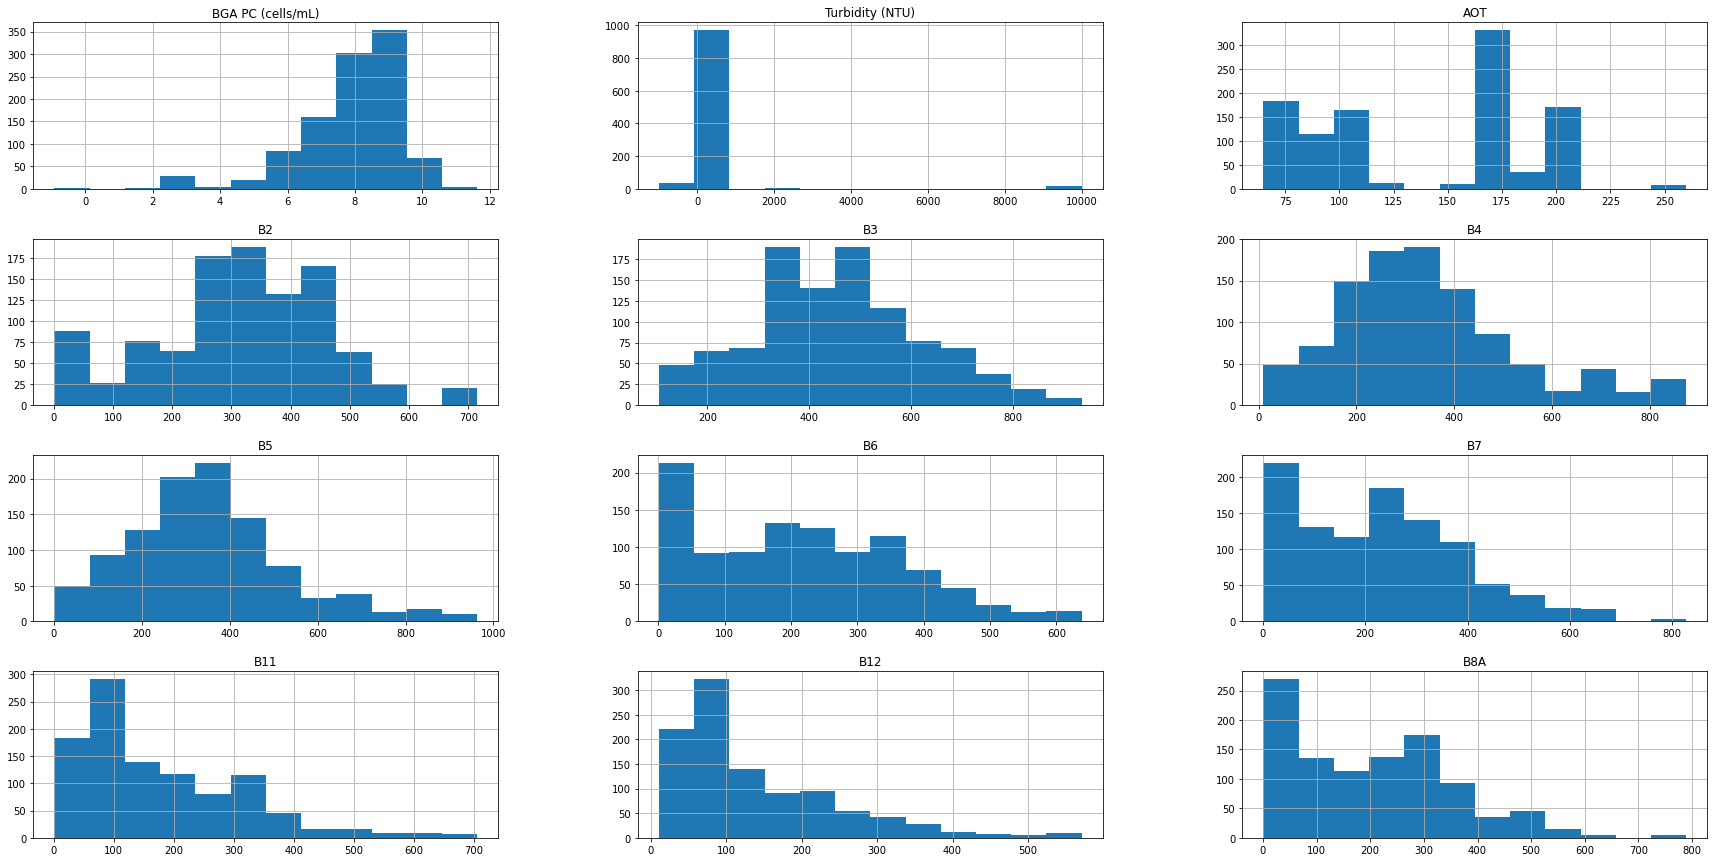

In [14]:
df.hist(figsize = (30,15), bins = 12)

In [15]:
df.describe()

,BGA PC (cells/mL),Turbidity (NTU),AOT,B2,B3,B4,B5,B6,B7,B11,B12,B8A
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,7.895483,157.023421,138.515063,317.097182,456.176871,348.470360,348.081633,214.849368,227.100097,175.440233,136.583090,196.838678
std,1.521846,1366.772977,49.665036,149.605715,165.042342,179.392355,178.930831,154.518405,166.417548,136.904862,108.429791,156.451436
min,-0.916291,-999.900000,65.000000,1.000000,105.000000,10.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000
25%,7.071573,0.700000,83.000000,240.000000,341.000000,225.000000,239.000000,83.000000,97.000000,72.000000,62.000000,50.000000
50%,8.235361,3.400000,165.000000,324.000000,451.000000,318.000000,328.000000,209.000000,221.000000,135.000000,100.000000,196.000000
75%,8.942984,9.300000,173.000000,425.000000,559.000000,440.000000,435.000000,325.000000,331.000000,253.000000,193.000000,300.000000
max,11.626825,9999.900000,260.000000,715.000000,935.000000,875.000000,963.000000,638.000000,827.000000,706.000000,571.000000,789.000000


In [16]:
df = df.dropna()
df.head()

,BGA PC (cells/mL),Turbidity (NTU),AOT,B2,B3,B4,B5,B6,B7,B11,B12,B8A
0,8.204125,28.3,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
1,8.131237,25.8,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
2,8.157944,24.9,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
3,8.104099,25.2,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0
4,8.060540,24.8,90.0,515.0,713.0,664.0,706.0,517.0,600.0,501.0,372.0,498.0


In [17]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,BGA PC (cells/mL),Turbidity (NTU),AOT,B2,B3,B4,B5,B6,B7,B11,B12,B8A
BGA PC (cells/mL),1.00,0.03,-0.56,0.41,0.09,0.03,0.20,0.51,0.51,0.43,0.36,0.55
Turbidity (NTU),0.03,1.00,0.07,-0.03,-0.07,-0.04,-0.01,-0.00,-0.00,0.10,0.07,0.04
AOT,-0.56,0.07,1.00,-0.16,0.04,0.05,-0.02,-0.27,-0.26,-0.09,-0.07,-0.28
B2,0.41,-0.03,-0.16,1.00,0.86,0.76,0.83,0.81,0.78,0.61,0.60,0.71
B3,0.09,-0.07,0.04,0.86,1.00,0.94,0.86,0.55,0.51,0.38,0.44,0.40
B4,0.03,-0.04,0.05,0.76,0.94,1.00,0.93,0.54,0.51,0.38,0.43,0.39
B5,0.20,-0.01,-0.02,0.83,0.86,0.93,1.00,0.74,0.71,0.55,0.57,0.60
B6,0.51,-0.00,-0.27,0.81,0.55,0.54,0.74,1.00,0.98,0.76,0.71,0.96
B7,0.51,-0.00,-0.26,0.78,0.51,0.51,0.71,0.98,1.00,0.78,0.71,0.97
B11,0.43,0.10,-0.09,0.61,0.38,0.38,0.55,0.76,0.78,1.00,0.97,0.85


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BGA PC (cells/mL)  1029 non-null   float64
 1   Turbidity (NTU)    1029 non-null   float64
 2   AOT                1029 non-null   float64
 3   B2                 1029 non-null   float64
 4   B3                 1029 non-null   float64
 5   B4                 1029 non-null   float64
 6   B5                 1029 non-null   float64
 7   B6                 1029 non-null   float64
 8   B7                 1029 non-null   float64
 9   B11                1029 non-null   float64
 10  B12                1029 non-null   float64
 11  B8A                1029 non-null   float64
dtypes: float64(12)
memory usage: 104.5 KB


In [19]:
#drop the columns of the dependent variables and independent variables
X = df.drop(columns = ["BGA PC (cells/mL)", "AOT", "Turbidity (NTU)", "B7", "B11"])
#Including necessary dependent variable
y = df[["BGA PC (cells/mL)"]]

In [20]:
rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
rf.fit(X,y)

RandomForestRegressor(n_estimators=300, random_state=42)

In [21]:
rf.feature_importances_

array([0.16964803, 0.08484371, 0.07111837, 0.08573209, 0.03209154,
       0.05637409, 0.50019216])

Text(0.5, 0, 'Random Forest Feature Importance')

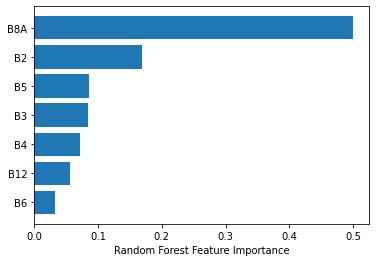

In [22]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [23]:
corr1 = X.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

,B2,B3,B4,B5,B6,B12,B8A
B2,1.00,0.86,0.76,0.83,0.81,0.60,0.71
B3,0.86,1.00,0.94,0.86,0.55,0.44,0.40
B4,0.76,0.94,1.00,0.93,0.54,0.43,0.39
B5,0.83,0.86,0.93,1.00,0.74,0.57,0.60
B6,0.81,0.55,0.54,0.74,1.00,0.71,0.96
B12,0.60,0.44,0.43,0.57,0.71,1.00,0.78
B8A,0.71,0.40,0.39,0.60,0.96,0.78,1.00


In [24]:
df = df.dropna(axis = 0)
df.head()
df.isnull().sum()

BGA PC (cells/mL)    0
Turbidity (NTU)      0
AOT                  0
B2                   0
B3                   0
B4                   0
B5                   0
B6                   0
B7                   0
B11                  0
B12                  0
B8A                  0
dtype: int64

In [25]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B2      1029 non-null   float64
 1   B3      1029 non-null   float64
 2   B4      1029 non-null   float64
 3   B5      1029 non-null   float64
 4   B6      1029 non-null   float64
 5   B12     1029 non-null   float64
 6   B8A     1029 non-null   float64
dtypes: float64(7)
memory usage: 64.3 KB


In [27]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1094
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BGA PC (cells/mL)  1029 non-null   float64
dtypes: float64(1)
memory usage: 16.1 KB


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 81 to 886
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B2      720 non-null    float64
 1   B3      720 non-null    float64
 2   B4      720 non-null    float64
 3   B5      720 non-null    float64
 4   B6      720 non-null    float64
 5   B12     720 non-null    float64
 6   B8A     720 non-null    float64
dtypes: float64(7)
memory usage: 45.0 KB


In [30]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 81 to 886
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BGA PC (cells/mL)  720 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 302 to 655
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B2      309 non-null    float64
 1   B3      309 non-null    float64
 2   B4      309 non-null    float64
 3   B5      309 non-null    float64
 4   B6      309 non-null    float64
 5   B12     309 non-null    float64
 6   B8A     309 non-null    float64
dtypes: float64(7)
memory usage: 19.3 KB


In [32]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 302 to 655
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BGA PC (cells/mL)  309 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


In [33]:
#calling the model and fitting the data points
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [34]:
#joblib.dump(lm, "lm_bga_joblib")

In [35]:
# load, no need to initialize the loaded_rf
loaded_lm = joblib.load("lm_bga_joblib")

In [36]:
y_pred = loaded_lm.predict(X_test)

In [37]:
#To retrieve the intercept:
print(loaded_lm.intercept_)
#For retrieving the slope:
print(loaded_lm.coef_)

[7.9367255]
[[ 1.30176375 -0.81162665 -0.56090155  0.41440395 -0.20737639 -0.08052724
   0.41624965]]


In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 value is:', r2_score(y_test,y_pred))

Mean Absolute Error: 0.8824603292397303
Mean Squared Error: 1.48221508063112
Root Mean Squared Error: 1.2174625582050234
R^2 value is: 0.4637151326448279


In [39]:
y_pred_train = loaded_lm.predict(X_train)

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R^2 value is:', r2_score(y_train,y_pred_train))

Mean Absolute Error: 0.804459013937631
Mean Squared Error: 1.242947560212595
Root Mean Squared Error: 1.1148755805974921
R^2 value is: 0.41194536802800996


In [41]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [42]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,4.867534,6.531895
1,8.407378,7.841407
2,6.361302,6.867515
3,6.767343,5.918849
4,7.613325,8.755036


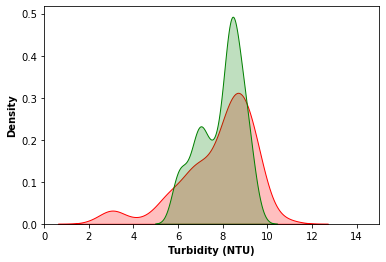

In [43]:
ax = sns.kdeplot(df["Actual"], shade=True, color="r")
ay = sns.kdeplot(df["Predicted"], shade=True, color="g")
ax.set_xlim(0,15)
ax.set_xlabel("Turbidity (NTU)", fontweight = 'bold')
ax.set_ylabel("Density", fontweight = 'bold')
plt.show()
#plt.savefig("figure6_2.tif", dpi = 300)

In [44]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("bga_joblib")

In [45]:
cls = RandomForestRegressor(criterion='mse')   

#cls.fit(X_train, y_train)


In [46]:
rf_pred = loaded_rf.predict(X_test)
#rf_pred

In [47]:
mse = metrics.mean_squared_error(y_test, rf_pred)
print(mse)
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R^2 value is:', r2_score(y_test,rf_pred))

0.5680956794312815
RMSE 0.7537212212955673
R^2 value is: 0.7944555280336725


In [48]:
rf_pred_train = loaded_rf.predict(X_train)
rf_pred_train.size

720

In [49]:
mse = metrics.mean_squared_error(y_train, rf_pred_train)
print(mse)
print("RMSE",np.sqrt(metrics.mean_squared_error(y_train,rf_pred_train)))
print('R^2 value is:', r2_score(y_train,rf_pred_train))

0.22511911168775348
RMSE 0.4744671871560282
R^2 value is: 0.8934932248060727


In [50]:
# #create a max_depth parameter
# max_depth =  [2,3,4,5,6,7,8,9,10,11]
# max_features = [2,3,4,5,6,7,8,9,10,11]
# min_samples_split = [2,4,5,10]
# min_samples_leaf = [1,5,10,15]

# #create a random grid for random search
# random_grid = {'max_depth' : max_depth,
# 'max_features': max_features,
# 'min_samples_split': min_samples_split,
# 'min_samples_leaf': min_samples_leaf}

# rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
# random_search = RandomizedSearchCV(rf, param_distributions = random_grid, n_iter = 50, cv = 3)
# random_search.fit(X_train, y_train)

# RF = random_search.best_estimator_

# RF.fit(X_train, y_train)

# #predicting a result for test
# y_pred = RF.predict(X_test)

# #predicting a result for train
# y_pred_train = RF.predict(X_train)

<AxesSubplot:title={'center':'Max_Depth Learning Curve'}, xlabel='max_depth'>

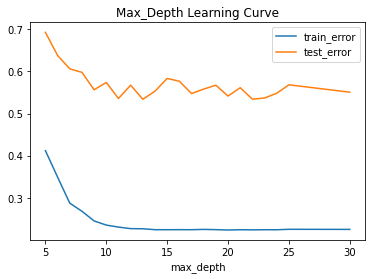

In [51]:
#Hyper paarmeter tuning
#Manually search for best max_depth
# Create empty array to store results
results = []
# Enumerate through different max_depth values and store results
for max_depth in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30]:
    RF = RandomForestRegressor(max_depth = max_depth,n_jobs = -1)
    RF.fit(X_train,y_train)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': metrics.mean_squared_error(y_train, RF.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, RF.predict(X_test))
        })

# Display Results
max_depth_lr = pd.DataFrame(results).set_index('max_depth').sort_index()
max_depth_lr

# Plot Max_Depth Learning Curve
max_depth_lr.plot(title="Max_Depth Learning Curve")

<AxesSubplot:title={'center':'max_features Learning Curve'}, xlabel='max_features'>

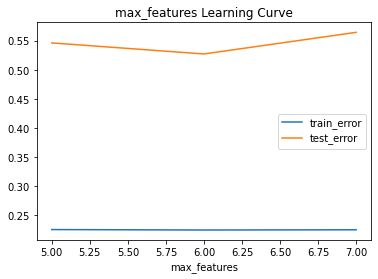

In [52]:
#Manually search for best max_features
results = []
for max_features in [5,6,7]:
    RF = RandomForestRegressor(max_features = max_features, max_depth  =16,n_jobs = -1)
    RF.fit(X_train,y_train)
    results.append(
        {
            'max_features': max_features,
            'train_error': metrics.mean_squared_error(y_train, RF.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, RF.predict(X_test))
        })

max_features_df = pd.DataFrame(results).set_index('max_features').sort_index()
max_features_df
max_features_df.plot(title="max_features Learning Curve")

<AxesSubplot:title={'center':'min_samples_split-Learning Curve'}, xlabel='min_samples_split'>

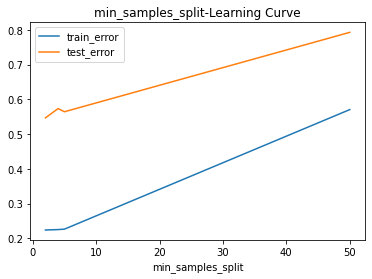

In [53]:
#For Best min_samples_split Parameter

results = []
for min_samples_split in [2,4,5,50]:
    RF = RandomForestRegressor(min_samples_split = min_samples_split, n_estimators = 300, max_depth  =16,max_features = 7,
                               n_jobs = -1 )
    RF.fit(X_train,y_train)
    results.append(
        {
            'min_samples_split': min_samples_split,
            'train_error': metrics.mean_squared_error(y_train, RF.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, RF.predict(X_test))
        })

min_samples_split_df = pd.DataFrame(results).set_index('min_samples_split').sort_index()
min_samples_split_df
min_samples_split_df.plot(title="min_samples_split-Learning Curve")

In [54]:
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 value is:', r2_score(y_test,y_pred))

MSE 1.48221508063112
RMSE 1.2174625582050234
R^2 value is: 0.4637151326448279


In [55]:
print(mean_squared_error(y_train,y_pred_train))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print('R^2 value is:', r2_score(y_train,y_pred_train))

1.242947560212595
RMSE 1.1148755805974921
R^2 value is: 0.41194536802800996


In [56]:
loaded_rf.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=694050639)

In [57]:
feature_list = list(X.columns)
feature_list

['B2', 'B3', 'B4', 'B5', 'B6', 'B12', 'B8A']

In [58]:
target = list(y.columns)
target

['BGA PC (cells/mL)']

In [59]:
fn = feature_list
cn = target

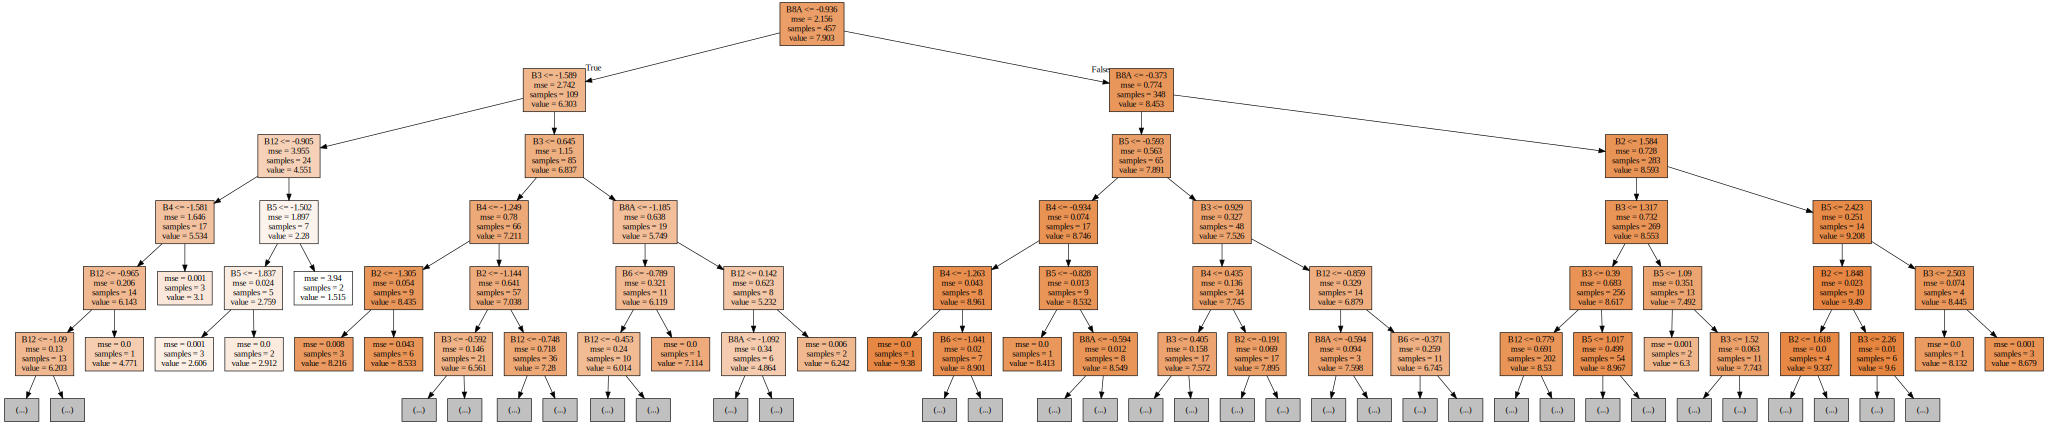

In [60]:
import graphviz
# DOT data
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,10), dpi=300)
dot_data = tree.export_graphviz(loaded_rf.estimators_[0], 
                                out_file=None, 
                                feature_names= fn,  
                                class_names=cn,
                                max_depth = 5,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="tif") 
graph

In [61]:
#graph.render("bga_supplementary")

In [62]:
text_representation = tree.export_text(loaded_rf.estimators_[0],feature_names = fn)
print(text_representation)

|--- B8A <= -0.94
|   |--- B3 <= -1.59
|   |   |--- B12 <= -0.91
|   |   |   |--- B4 <= -1.58
|   |   |   |   |--- B12 <= -0.96
|   |   |   |   |   |--- B12 <= -1.09
|   |   |   |   |   |   |--- value: [5.38]
|   |   |   |   |   |--- B12 >  -1.09
|   |   |   |   |   |   |--- B12 <= -1.01
|   |   |   |   |   |   |   |--- B4 <= -1.65
|   |   |   |   |   |   |   |   |--- value: [6.17]
|   |   |   |   |   |   |   |--- B4 >  -1.65
|   |   |   |   |   |   |   |   |--- value: [6.24]
|   |   |   |   |   |   |--- B12 >  -1.01
|   |   |   |   |   |   |   |--- value: [6.43]
|   |   |   |   |--- B12 >  -0.96
|   |   |   |   |   |--- value: [4.77]
|   |   |   |--- B4 >  -1.58
|   |   |   |   |--- value: [3.10]
|   |   |--- B12 >  -0.91
|   |   |   |--- B5 <= -1.50
|   |   |   |   |--- B5 <= -1.84
|   |   |   |   |   |--- value: [2.61]
|   |   |   |   |--- B5 >  -1.84
|   |   |   |   |   |--- value: [2.91]
|   |   |   |--- B5 >  -1.50
|   |   |   |   |--- value: [1.51]
|   |--- B3 >  -1.59
|   |   |

In [63]:
# with open("bga_tree.log", "w") as fout:
#     fout.write(text_representation)

In [64]:
clf = SVR()
clf.fit(X_train, y_train)

SVR()

In [65]:
# save
#joblib.dump(clf, "svr_bga_joblib")

In [66]:
# load, no need to initialize the loaded_rf
loaded_svr = joblib.load("svr_bga_joblib")

In [67]:
sv_pred = loaded_svr.predict(X_test)
#sv_pred

In [68]:
mse = metrics.mean_squared_error(y_test, sv_pred)
print(np.sqrt(metrics.mean_squared_error(y_test, sv_pred)))
print(mse)
print('R^2 value is:', r2_score(y_test,sv_pred))

1.0318781361714373
1.0647724879086393
R^2 value is: 0.6147513408118994


In [69]:
sv_pred_train = loaded_svr.predict(X_train)
sv_pred_train

array([8.75729819, 8.91988498, 8.8042172 , 7.58105669, 8.02632645,
       6.19321231, 6.5282748 , 8.04544997, 8.74374885, 8.24844219,
       6.59753701, 7.92031494, 8.72439499, 9.18235892, 8.71874284,
       7.61239345, 8.90174536, 8.49475375, 8.75799832, 8.85403548,
       8.48868488, 8.62082991, 5.99934518, 7.14207281, 9.00036481,
       6.13010043, 8.12680431, 7.40017143, 8.80229332, 8.74374885,
       8.91988498, 8.49475375, 7.92734632, 7.53809092, 7.53809092,
       8.35446634, 7.99477757, 8.90001297, 8.24844219, 7.87930816,
       6.59753701, 8.6089584 , 9.54126414, 6.5282748 , 8.44617816,
       6.17464066, 7.04381737, 8.64075542, 8.00980548, 8.62018601,
       8.84293297, 8.76958167, 7.40017143, 6.42598914, 8.45353237,
       6.83558081, 8.74374885, 8.38731811, 8.73276961, 8.16038281,
       7.71399719, 6.49633477, 8.90001297, 8.38649065, 8.41702317,
       9.15490805, 7.92734632, 7.77656191, 8.55579928, 6.80911315,
       8.70742483, 8.39156689, 9.11308705, 8.95437906, 7.08219

In [70]:
mse = metrics.mean_squared_error(y_train, sv_pred_train)
print(np.sqrt(metrics.mean_squared_error(y_train, sv_pred_train)))
print(mse)
print('R^2 value is:', r2_score(y_train, sv_pred_train))

0.8834470848309104
0.7804787516962338
R^2 value is: 0.6307453670755141
